# Sommaire
- <a href="#C1">Import des librairies
- <a href="#C2">Import des datasets
- <a href="#C3">Retraitement dataset disponibilité alimentaire 2017
    - <a href="#C4">Transposition pour mettre les variables en colonnes
    - <a href="#C5">Taux de données manquantes et retraitements
- <a href="#C6">Retraitements dataset population 2000 2018
- <a href="#C7">Fusion des datasets
- <a href="#C8">Analyse univariée avant retraitement des variables
    - <a href="#C10">Conclusion
- <a href="#C11">Retraitement et création de variables
    - <a href="#C9">Remplacement des lignes où variables d'utilisations inférieures à 0
    - <a href="#C12">Modification des variables exprimées en milliers de tonnes
    - <a href="#C13">Modification de la variable Population
    - <a href="#C14">Suppression de la variable Résidus
    - <a href="#C15">Création colonne ratio volaille_sur_total (g./pers./an)
    - <a href="#C16">Suppression des lignes hors viande de volaille
- <a href="#C19">Ajout de variables provenant d'autres sources
    - <a href="#C191">Ajout des codes zone (id FAO)
    - <a href="#C192">Ajout des codes pays (id Banque mondiale)
    - <a href="#C20">Stabilité politique
    - <a href="#C21">PIB par habitant
    - <a href="#C22">Croissance du PIB
    - <a href="#C23">Indice de prix des produits alimentaires et des prix à la consommation
    - <a href="#C24">Index du prix à la production de la viande de volaille
    - <a href="#C25">Taux importations sur disponibilité intérieure
    - <a href="#C26">Taux de croissance de la population
    - <a href="#C27">Indice de performance logistique
    - <a href="#C28">Indice de performance environnementale
    - <a href="#C29">Indice de la solidité des garanties juridiques
    - <a href="#C30">Remplacement des valeurs manquantes par la moyenne
- <a href="#C17">Analyse univariée après retraitement des variables
    - <a href="#C18">Conclusion analyse univariée après retraitement des variables
- <a href="#C100">Export du dataset

# <a name="C1">Import des librairies

In [124]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import seaborn as sns

pd.options.display.max_columns = None # pour afficher toutes les colonnes
pd.options.display.max_rows = None # pour afficher toutes les lignes

# <a name="C2">Import et lecture des datasets

In [125]:
dispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')   
pop = pd.read_csv('Population_2000_2018.csv')

# <a name="C3">Retraitements Disponibilité alimentaire 2017

In [126]:
dispo.head(50)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.00,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.00,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.00,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.00,S,Données standardisées


In [127]:
dispo.describe(include='all', datetime_is_numeric=True)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


Suprresion des colonnes inutiles pour l'analyse.
On a besoin des colonnes :
- Zone (le pays)
- l'Élement (le nom de la variable quantitative à étudier dans l'analyse)
- la colonne Produit (pour pouvoir garder la viande de volailles)
- l'unité (pour vérifier que chaque élément a bien la même unité de mesure sur toutes les lignes avant suppression car centrage réduction des données)
- Valeur (valeur de la variable Élément)

In [128]:
dispo1 = dispo.drop(columns=['Code Domaine', 'Domaine','Code Élément','Code Produit','Code année','Année',\
                            'Symbole','Description du Symbole'])

Taux de données manquantes :

In [129]:
tx = (dispo.isna().sum()/len(dispo))*100
tx

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

Pas de données manquantes.

Vérification de l'unicité des unités de mesure par Élément :

In [130]:
temp_df = pd.pivot_table(dispo,
                         values=['Valeur'],
                         aggfunc='count',
                         index=['Élément','Unité'])
temp_df

,,Valeur
Élément,Unité,
Alimentation pour touristes,Milliers de tonnes,5560
Aliments pour animaux,Milliers de tonnes,4188
Autres utilisations (non alimentaire),Milliers de tonnes,5292
Disponibilité alimentaire (Kcal/personne/jour),Kcal/personne/jour,14476
Disponibilité alimentaire en quantité (kg/personne/an),kg,14618
Disponibilité de matière grasse en quantité (g/personne/jour),g/personne/jour,14512
Disponibilité de protéines en quantité (g/personne/jour),g/personne/jour,14507
Disponibilité intérieure,Milliers de tonnes,15905
Exportations - Quantité,Milliers de tonnes,12113


Il y a une unité de mesure par Élément, toutes sont exprimées en milliers de tonnes exceptées les disponibilités par personne, on peut donc supprimer la colonne Unité :

In [131]:
dispo2 = dispo1.drop(columns=['Unité'])

## <a name="C4">Transposition pour mettre les variables en colonnes

In [132]:
dispo2.head()

,Code zone,Zone,Élément,Produit,Valeur
0,2,Afghanistan,Production,Blé et produits,4281.0
1,2,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,2,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [133]:
# Suppression colonne Code zone
dispo2 = dispo2.drop(columns='Code zone')

In [134]:
dispo3 = dispo2.groupby(['Zone','Élément', 'Produit']).sum().transpose().stack([0,2])
dispo3.head(50)

Élément                                             Alimentation pour touristes  \
       Zone        Produit                                                        
Valeur Afghanistan Abats Comestible                                         NaN   
                   Agrumes, Autres                                          NaN   
                   Alcool, non Comestible                                   NaN   
                   Aliments pour enfants                                    NaN   
                   Ananas et produits                                       NaN   
                   Arachides Decortiquees                                   NaN   
                   Avoine                                                   NaN   
                   Bananes                                                  NaN   
                   Beurre, Ghee                                             NaN   
                   Bière                                                    NaN   
                   Blé et produits                                          NaN   
                   Boissons Alcooliques                                     NaN   
                   Boissons Fermentés                                       NaN   
                   Café et produits                                         NaN   
                   Citrons & Limes et produits                              NaN   
                   Coco (Incl Coprah)                                       NaN   
                   Crème                                                    NaN   
                   Céréales, Autres                                         NaN   
                   Dattes                                                   NaN   
                   Edulcorants Autres                                       NaN   
                   Feve de Cacao et produits                                NaN   
                   Fruits, Autres                                           NaN   
                   Girofles                                                 NaN   
                   Graines Colza/Moutarde                                   NaN   
                   Graines de coton                                         NaN   
                   Graines de tournesol                                     NaN   
                   Graisses Animales Crue                                   NaN   
                   Haricots                                                 NaN   
                   Huil Plantes Oleif Autr                                  NaN   
                   Huile Graines de Coton                                   NaN   
                   Huile d'Arachide                                         NaN   
                   Huile d'Olive                                            NaN   
                   Huile de Coco                                            NaN   
                   Huile de Colza&Moutarde                                  NaN   
                   Huile de Germe de Maïs                                   NaN   
                   Huile de Palme                                           NaN   
                   Huile de Palmistes                                       NaN   
                   Huile de Soja                                            NaN   
                   Huile de Son de Riz                                      NaN   
                   Huile de Sésame                                          NaN   
                   Huile de Tournesol                                       NaN   
                   Ignames                                                  NaN   
                   Lait - Excl Beurre                                       NaN   
                   Légumes, Autres                                          NaN   
                   Légumineuses Autres et produits                          NaN   
                   Maïs et produits                                         NaN   
                

In [135]:
# Suppression des index de ligne :
dispo4 = dispo3.droplevel(level=0)
dispo4 = dispo4.reset_index(level='Zone')
dispo4 = dispo4.reset_index(level='Produit')
dispo4.head()

Élément,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Abats Comestible,Afghanistan,NaN,NaN,NaN,5.0,1.47,0.19,0.64,53.0,NaN,6.0,53.0,NaN,48.0,0.0,NaN,NaN,NaN
1,"Agrumes, Autres",Afghanistan,NaN,NaN,NaN,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,NaN,NaN,NaN
2,"Alcool, non Comestible",Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0
3,Aliments pour enfants,Afghanistan,NaN,NaN,NaN,1.0,0.10,0.01,0.04,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Ananas et produits,Afghanistan,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN


## <a name="C5">Taux de données manquantes et retraitements

In [136]:
tx = (dispo4.isna().sum()/len(dispo))*100
tx

Élément
Produit                                                          0.000000
Zone                                                             0.000000
Alimentation pour touristes                                      5.938279
Aliments pour animaux                                            6.715176
Autres utilisations (non alimentaire)                            6.090034
Disponibilité alimentaire (Kcal/personne/jour)                   0.889581
Disponibilité alimentaire en quantité (kg/personne/an)           0.809173
Disponibilité de matière grasse en quantité (g/personne/jour)    0.869196
Disponibilité de protéines en quantité (g/personne/jour)         0.872027
Disponibilité intérieure                                         0.080408
Exportations - Quantité                                          2.227633
Importations - Quantité                                          0.445640
Nourriture                                                       0.877123
Pertes                        

Les données manquantes sont-elles de vrais NaN ou des 0 ?

Vérification de la cohérence interne du dataset en les utilisations des ressources. On est censé trouver 0.

In [137]:
# remplacement temporaire des NaN par des 0 pour les besoins du calcul
dispo5 = dispo4.fillna(0)

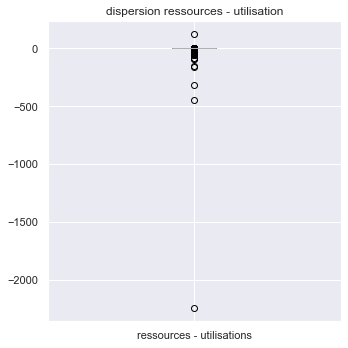

In [138]:
# création des colonnes total ressources, total utilisations et ressources - utilisations
dispo5['total ressources'] = dispo5['Production']+dispo5['Importations - Quantité']

dispo5['total utilisations'] = dispo5['Alimentation pour touristes']+dispo5['Aliments pour animaux']\
                            +dispo5['Autres utilisations (non alimentaire)']\
                            +dispo5['Exportations - Quantité']\
                            +dispo5['Nourriture']+dispo5['Pertes']+dispo5['Résidus']\
                            +dispo5['Semences']+dispo5['Traitement']\
                            +dispo5['Variation de stock']

dispo5['ressources - utilisations'] = dispo5['total ressources'] - dispo5['total utilisations']

# dispersion de la comparaison ressources - utilisation
sns.set(rc={'figure.figsize':(5,5)})
plt.title('dispersion ressources - utilisation')
boxplot = dispo5.boxplot(column='ressources - utilisations')

Statistiques descriptives sur colonne ressources - utilisations pour étude de la dispersion :

In [139]:
dispo5['ressources - utilisations'].describe()

count    16047.000000
mean        -0.224154
std         18.424896
min      -2243.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        120.000000
Name: ressources - utilisations, dtype: float64

Q1, Q2 et Q3 à 0 : données très resserrées.

Extraction des lignes où ressources - utilisations différent de 0 :

In [140]:
temp_df = dispo5[(dispo5['ressources - utilisations'] < 0) | (dispo5['ressources - utilisations'] > 0)]
print('Nombre de lignes :',len(temp_df))
print('%age de lignes sur le dataset :',len(temp_df)/len(dispo5)*100)

Nombre de lignes : 4033
%age de lignes sur le dataset : 25.13242350595127


Extraction des lignes où ressources - utilisations différent de l'intervalle [-1,1]  car résultats dans [-1,1] sans être égaux à 0 sont probablement des problèmes d'arrondi :

In [141]:
temp_df = dispo5[(dispo5['ressources - utilisations'] < -1) | (dispo5['ressources - utilisations'] > 1)]
print('Nombre de lignes :',len(temp_df))
print('%age de lignes sur le dataset :',len(temp_df)/len(dispo5)*100)

Nombre de lignes : 191
%age de lignes sur le dataset : 1.1902536299619868


Etude de la dispersion de ces lignes :

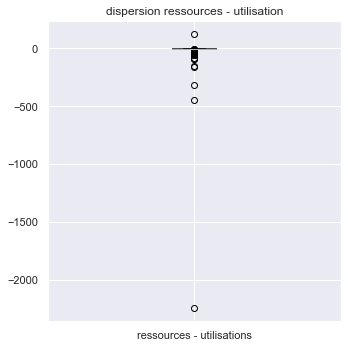

In [142]:
sns.set(rc={'figure.figsize':(5,5)})
plt.title('dispersion ressources - utilisation')
boxplot = temp_df.boxplot(column='ressources - utilisations')

In [143]:
temp_df['ressources - utilisations'].describe()

count     191.000000
mean      -21.722513
std       167.867151
min     -2243.000000
25%        -2.000000
50%        -2.000000
75%         2.000000
max       120.000000
Name: ressources - utilisations, dtype: float64

La moitié des valeurs sont contenues dans [-2, 2].

Combien de lignes en-dehors de l'intervalle [-2, 2] ?

In [144]:
temp_df = dispo5[(dispo5['ressources - utilisations'] < -2) | (dispo5['ressources - utilisations'] > 2)]
print('Nombre de lignes :',len(temp_df))
print('%age de lignes sur le dataset :',len(temp_df)/len(dispo5)*100)

Nombre de lignes : 43
%age de lignes sur le dataset : 0.26796285910138967


In [145]:
temp_df

Élément,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations
426,Perciform,Allemagne,0.0,0.0,0.0,20.0,3.95,1.37,1.84,327.0,535.0,761.0,327.0,0.0,88.0,0.0,0.0,0.0,13.0,849.0,875.0,-26.0
2132,"Mollusques, Autres",Bulgarie,0.0,0.0,0.0,0.0,0.13,0.00,0.02,1.0,17.0,8.0,1.0,0.0,8.0,0.0,0.0,0.0,3.0,16.0,21.0,-5.0
2428,"Poissons Marins, Autres",Bénin,0.0,0.0,0.0,10.0,6.21,0.33,1.61,69.0,0.0,41.0,69.0,0.0,0.0,0.0,0.0,0.0,28.0,41.0,97.0,-56.0
2520,Poissons Pelagiques,Cabo Verde,0.0,0.0,0.0,13.0,5.52,0.58,1.90,3.0,29.0,0.0,3.0,0.0,18.0,0.0,0.0,0.0,13.0,18.0,45.0,-27.0
2845,Cephalopodes,Chili,0.0,0.0,53.0,1.0,0.64,0.01,0.24,64.0,104.0,1.0,12.0,0.0,156.0,0.0,0.0,0.0,11.0,157.0,180.0,-23.0
2883,"Mollusques, Autres",Chili,0.0,0.0,74.0,0.0,0.76,0.01,0.06,88.0,255.0,3.0,14.0,0.0,400.0,0.0,0.0,0.0,-60.0,403.0,283.0,120.0
3126,Cephalopodes,"Chine, Taiwan Province de",0.0,0.0,0.0,10.0,4.84,0.11,1.96,115.0,43.0,44.0,115.0,0.0,33.0,0.0,0.0,0.0,81.0,77.0,239.0,-162.0
3165,"Mollusques, Autres","Chine, Taiwan Province de",0.0,0.0,0.0,3.0,6.64,0.06,0.50,157.0,22.0,82.0,157.0,0.0,67.0,0.0,0.0,0.0,30.0,149.0,209.0,-60.0
3182,Poissons Pelagiques,"Chine, Taiwan Province de",0.0,632.0,0.0,7.0,3.11,0.34,0.97,706.0,517.0,586.0,74.0,0.0,612.0,0.0,0.0,0.0,25.0,1198.0,1248.0,-50.0
3224,Crustacés,"Chine, continentale",0.0,0.0,0.0,6.0,4.54,0.06,1.12,6448.0,868.0,336.0,6448.0,0.0,6953.0,0.0,0.0,0.0,27.0,7289.0,7343.0,-54.0


Le problème semble se situer avant tout sur les produits de la mer.

Vérification :

In [146]:
temp_df['Produit'].value_counts()

Poissons Pelagiques         10
Crustacés                    7
Perciform                    7
Cephalopodes                 5
Poissons Marins, Autres      4
Huiles de Poissons           3
Mollusques, Autres           3
Poissons Eau Douce           2
Animaux Aquatiques Autre     1
Pois                         1
Name: Produit, dtype: int64

Il n'y a que des produits de la mer, sauf une ligne sur les Pois.

Conclusion : suppression des lignes où ressources - utilisations n'est pas dans l'intervalle [-2, 2] :

In [147]:
dispo6 = dispo5[(dispo5['ressources - utilisations'] >= -2) & (dispo5['ressources - utilisations'] <= 2)]
print('Nombre de lignes sans lignes suspectes', len(dispo6))
print('Vérification :',len(dispo5)-len(dispo6)-43) # 43 = nombre de lignes où ress. - util. != [-2,2]

Nombre de lignes sans lignes suspectes 16004
Vérification : 0


Vérification par les statistiques descriptives :

In [148]:
dispo6['ressources - utilisations'].describe()

count    16004.000000
mean         0.037491
std          0.525040
min         -2.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ressources - utilisations, dtype: float64

## <a name="C6">Retraitements population_2000_2018

In [149]:
pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


Suppression des colonnes inutiles :

In [150]:
pop1 = pop[['Zone','Année','Valeur']].copy()
pop1.describe(include='all')

,Zone,Année,Valeur
count,4411,4411.000000,4.411000e+03
unique,238,NaN,NaN
top,Maroc,NaN,NaN
freq,19,NaN,NaN
mean,NaN,2009.068238,2.963004e+04
std,NaN,5.481539,1.238029e+05
min,NaN,2000.000000,7.850000e-01
25%,NaN,2004.000000,3.921890e+02
50%,NaN,2009.000000,4.764741e+03
75%,NaN,2014.000000,1.821548e+04


Suppression des années inutiles (toutes sauf 2017 car dataset diponibilité alimentaire contient les données de 2017) :

In [151]:
pop2 = pop1[pop1['Année'] == 2017]
pop2['Année'].describe()

count     236.0
mean     2017.0
std         0.0
min      2017.0
25%      2017.0
50%      2017.0
75%      2017.0
max      2017.0
Name: Année, dtype: float64

# <a name="C7">fusion des datasets

In [152]:
dispo6.head()

Élément,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,53.0,0.0,6.0,53.0,0.0,48.0,0.0,0.0,0.0,0.0,54.0,53.0,1.0
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
df = dispo6.merge(pop2,
                  how='left',
                  on='Zone',
                  indicator=True)
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,total ressources,total utilisations,ressources - utilisations,Année,Valeur,_merge
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,53.0,0.0,6.0,53.0,0.0,48.0,0.0,0.0,0.0,0.0,54.0,53.0,1.0,2017,36296.113,both
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,2017,36296.113,both
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296.113,both
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2017,36296.113,both
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296.113,both


In [154]:
df['_merge'].value_counts()

both          16004
right_only        0
left_only         0
Name: _merge, dtype: int64

In [155]:
df.iloc[2918]

Produit                                                                  Abats Comestible
Zone                                                             Chine - RAS de Hong-Kong
Alimentation pour touristes                                                           -18
Aliments pour animaux                                                                   0
Autres utilisations (non alimentaire)                                                 132
Disponibilité alimentaire (Kcal/personne/jour)                                         98
Disponibilité alimentaire en quantité (kg/personne/an)                              32.82
Disponibilité de matière grasse en quantité (g/personne/jour)                        2.61
Disponibilité de protéines en quantité (g/personne/jour)                            16.34
Disponibilité intérieure                                                              291
Exportations - Quantité                                                               586
Importatio

Fusion validée.

Supperssion des colonnes qui ne vont pas servir (sauf colonne 'ressources - utilisations' pour analyse univariée) :

In [156]:
df1 = df.drop(columns=['total ressources','total utilisations','ressources - utilisations','Année','_merge'])
df1.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Valeur
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,53.0,0.0,6.0,53.0,0.0,48.0,0.0,0.0,0.0,0.0,36296.113
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,0.0,0.0,0.0,36296.113
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113


Renommage colonne Valeur pour être plus explicite :

In [157]:
df2 = df1.rename(columns={'Valeur':'Population en milliers'})
df2.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population en milliers
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,53.0,0.0,6.0,53.0,0.0,48.0,0.0,0.0,0.0,0.0,36296.113
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,50.0,0.0,33.0,48.0,2.0,17.0,0.0,0.0,0.0,0.0,36296.113
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296.113


In [158]:
df = df2

## <a name="C8"> Analyse univariée avant retraitement des variables en fonction de la population

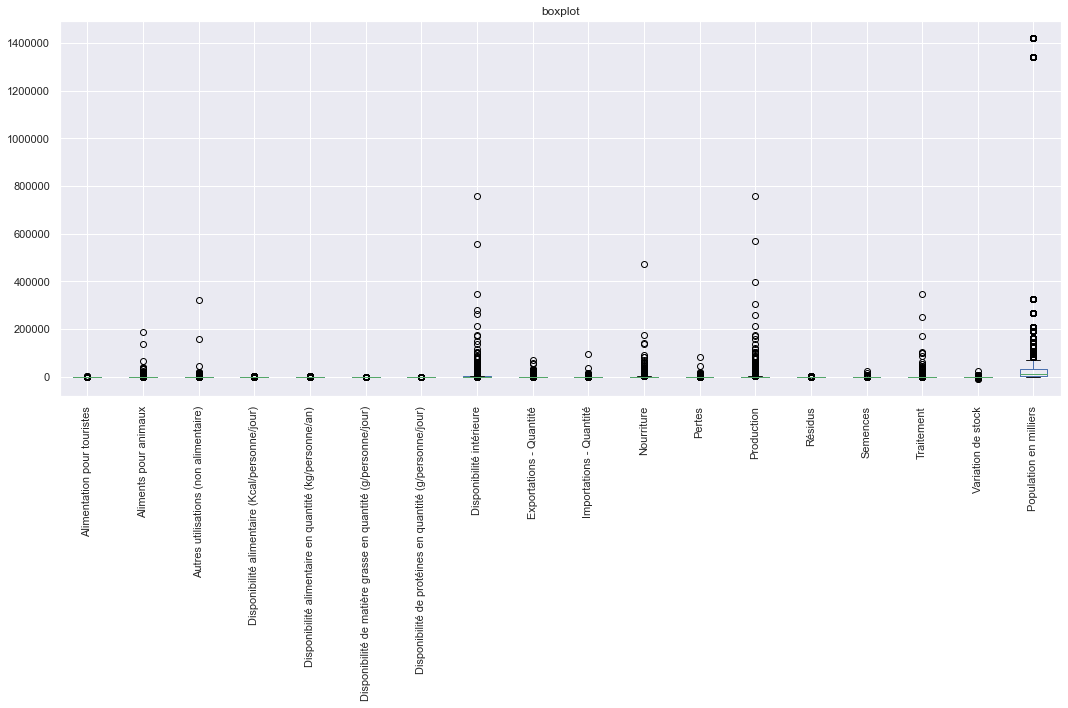

None
       Alimentation pour touristes  Aliments pour animaux  \
count                 16004.000000           16004.000000   
mean                      0.062359              94.573482   
std                       2.117255            2075.608695   
min                     -44.000000              -2.000000   
25%                       0.000000               0.000000   
50%                       0.000000               0.000000   
75%                       0.000000               0.000000   
max                     166.000000          187553.000000   

       Autres utilisations (non alimentaire)  \
count                           16004.000000   
mean                               58.104474   
std                              2864.399965   
min                                -1.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                            319603.000000   

       Dispo

In [159]:
# Suppression des colonnes Zone et Produit
df1 = df.drop(columns=['Zone','Produit'])

# Set the figure size
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df1.plot(kind='box', title='boxplot')

# Rotate X ticks to see them
plt.xticks(rotation=90)

# disable both the offset and scientific notation
plt.ticklabel_format(style='plain', axis='y') # Specify axis if one swow categorical values

# Display the plot
print(plt.show())

# Statistiques descriptives
print(df1.describe())

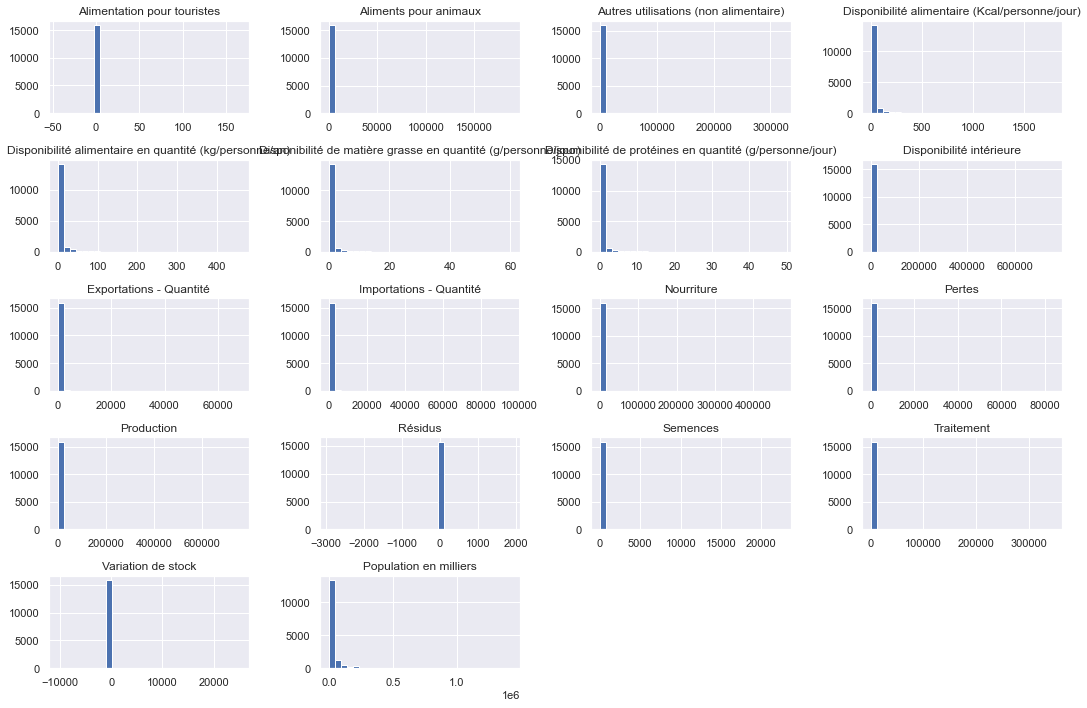

In [160]:
df1.hist(bins=30, figsize=(15, 10));

## <a name="C10">Conclusion

### Il est logiquement impossible d'avoir des valeurs inférieures à 0 pour :

    - Alimentation pour touristes
    - Aliments pour animaux
    - Autres utilisations (non alimentaire)
    - Disponibilité intérieure

Remplacement des données par 0.

#### Variables exprimées en milliers de tonnes :

Les quantités doivent être ramenées à des montants par habitant pour ne pas fausser l'analyse.

#### Variable Population
Expression de la variable Population sous la forme d'un ratio population du pays divisé par la population mondiale pour ne pas fausser l'analyse (les outliers de la variable population - Chine, Inde, ... -aurait trop de poids et risqueraient de créer des clusters en fonction du nombre d'habitants).

#### Variable Résidus :

"It is defined as the imbalance (positive or negative) in the supply and utilization equation. It occures mainly due to the inconsitencies of national data provided by countries." (Definitions and standards, catégorie Bilans alimentaires, site de la FAO, https://www.fao.org/faostat/fr/#data/FBS)

Variable d'ajustement pour pallier aux incohérences des données.

A supprimer car inutile dans l'analyse.


#### Création d'une variable ratio de la volaille sur quantité totale des aliments

Afin de se concentrer sur la viande de volaille, il faut enlever les autres produits mais on peut créer la variable du ratio de la quantité de volaille sur le total des produits en quantité.

#### Suppression des lignes hors viande de volaille
APrès avoir créé la ratio de la viande de volaille sur la quantité totale des aliments, on peut supprimer les autres produits.

#### Ajout de variables pour procéder à l'analyse PESTEL

# <a name="C11">Retraitement et création de variables

## <a name="C9">Remplacement par 0 des lignes où variables d'utilisation inférieures à 0

### Etude des lignes

In [161]:
# Extraction de ces lignes, Nombre de lignes, pourcentage de lignes sur le dataset global et catégories de produits concernés
temp_df = df.loc[(df['Alimentation pour touristes']<0) | (df['Aliments pour animaux']<0)\
                | (df['Autres utilisations (non alimentaire)']<0) | (df['Disponibilité intérieure']<0)]
print('Nombre de lignes :',len(temp_df))
print('Pourcentage des lignes du dataset :',round(len(temp_df)/len(df)*100,2))
print('Catégorie des produits :','\n',temp_df.value_counts('Produit'))

Nombre de lignes : 246
Pourcentage des lignes du dataset : 1.54
Catégorie des produits : 
 Produit
Miscellanees                       30
Aliments pour enfants              21
Boissons Fermentés                  9
Huil Plantes Oleif Autr             8
Alcool, non Comestible              8
Café et produits                    8
Plantes Oleiferes, Autre            7
Abats Comestible                    6
Edulcorants Autres                  6
Noix et produits                    6
Soja                                6
Bananes plantains                   5
Agrumes, Autres                     5
Oranges, Mandarines                 5
Ananas et produits                  5
Citrons & Limes et produits         4
Graines Colza/Moutarde              4
Boissons Alcooliques                4
Huile de Colza&Moutarde             4
Sésame                              4
Riz et produits                     3
Vin                                 3
Légumineuses Autres et produits     3
Viande de Bovins           

### Remplacement des valeurs par 0

In [162]:
df.loc[df['Alimentation pour touristes'] < 0, 'Alimentation pour touristes'] = 0
df.loc[df['Aliments pour animaux'] < 0, 'Aliments pour animaux'] = 0
df.loc[df['Autres utilisations (non alimentaire)'] < 0, 'Autres utilisations (non alimentaire)'] = 0
df.loc[df['Disponibilité intérieure'] < 0, 'Disponibilité intérieure'] = 0

### Vérification

In [163]:
# Extraction de ces lignes, Nombre de lignes, pourcentage de lignes sur le dataset global et catégories de produits concernés
temp_df = df.loc[(df['Alimentation pour touristes']<0) | (df['Aliments pour animaux']<0)\
                | (df['Autres utilisations (non alimentaire)']<0) | (df['Disponibilité intérieure']<0)]
print('Nombre de lignes :',len(temp_df))
print('Pourcentage des lignes du dataset :',round(len(temp_df)/len(df)*100,2))
print('Catégorie des produits :','\n',temp_df.value_counts('Produit'))

Nombre de lignes : 0
Pourcentage des lignes du dataset : 0.0
Catégorie des produits : 
 Series([], dtype: int64)


### <a name="C12"> Modification des variables exprimées en milliers de tonnes

In [164]:
# transformation des colonnes en milliers de tonnes en kilog pour ne pas avoir des 0 quand on divisera par la population

df[['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)',\
    'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité',\
    'Nourriture','Pertes','Production','Résidus','Semences','Traitement','Variation de stock']]\
    = df[['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)',\
    'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité',\
    'Nourriture','Pertes','Production','Résidus','Semences','Traitement','Variation de stock']]\
    .mul(1000000,axis=0)

# Création de la colonne Population pour ne pas avoir de 0..
# ..lors du calcul des ratios variables en kg divisées par population
df['Population'] = df['Population en milliers']*1000

# Suppression de la colonne Population en milliers
df.drop(columns='Population en milliers',inplace=True)

# Division de toutes les variables exprimées en kilo par la population du pays
df[['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)',\
    'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité',\
    'Nourriture','Pertes','Production','Résidus','Semences','Traitement','Variation de stock']]\
    = df[['Alimentation pour touristes','Aliments pour animaux','Autres utilisations (non alimentaire)',\
    'Disponibilité intérieure','Exportations - Quantité','Importations - Quantité',\
    'Nourriture','Pertes','Production','Résidus','Semences','Traitement','Variation de stock']]\
    .div(df['Population'],axis=0)

# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.0,36296113.0
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.0,36296113.0
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,36296113.0
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.0,36296113.0
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,36296113.0


On obtient le nombre de kilo par habitant pour une année pour toutes les variables exprimées en milliers de tonnes à l'origine.

### <a name="C13"> Modification de la variable Population

In [165]:
# Extraction de la population mondiale selon le dataset dans une variable dédiée
temp_df = pd.pivot_table(df,
                         values=['Population'],
                         aggfunc='mean',
                         index='Zone')
population_mondiale = temp_df.sum()

In [166]:
population_mondiale

Population    7.369269e+09
dtype: float64

In [167]:
# Création de la variable ratio population du pays sur population mondiale
df['Population %'] = df['Population']/7369269325*100

# Suppression de la colonne Population
df.drop(columns='Population', inplace=True)

# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,Population %
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.0,0.492533
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.0,0.492533
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.492533
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.0,0.492533
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.492533


### <a name="C14">Suppression de la variable Résidus

Comme on ne sait pas ce que représente la variable Résidus, on l'enlève du Dataset.

In [168]:
df.drop(columns=['Résidus'],inplace=True)

# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533


### <a name="C15"> Création colonne ratio volaille_sur_total (g./pers./an)

In [169]:
# Extraction total quantité en kg par pays
temp_df = pd.pivot_table(df,
                         values=['Disponibilité alimentaire en quantité (kg/personne/an)'],
                         aggfunc='sum',
                         index='Zone')
temp_df

,Disponibilité alimentaire en quantité (kg/personne/an)
Zone,
Afghanistan,357.31
Afrique du Sud,556.42
Albanie,1260.49
Algérie,798.71
Allemagne,939.29
Angola,570.95
Antigua-et-Barbuda,632.98
Arabie saoudite,546.35
Argentine,776.64


In [170]:
# Fusion des datasets
df = df.merge(temp_df,
              how='outer',
              on=['Zone'],
              indicator=True)

In [171]:
# Vérification de la fusion
df.value_counts('_merge')

_merge
both          16004
right_only        0
left_only         0
dtype: int64

In [172]:
# Fusion validée.

# Suppression de la colonne _merge :
df.drop(columns='_merge',inplace=True)

In [173]:
# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)_x,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,Disponibilité alimentaire en quantité (kg/personne/an)_y
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533,357.31
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533,357.31
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31


In [174]:
# Changement du nom de la colonne fusionnée
df = df.rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)_y":"Disponibilité totale (kg/pers./an)"})

In [175]:
# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)_x,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,Disponibilité totale (kg/pers./an)
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533,357.31
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533,357.31
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31


In [176]:
# Transformation de la colonne Disponibilité totale (kg/pers./an) en grammes..
# ..(pour ne pas avoir 0 lors du calcul du ratio)
df['Disponibilité totale (g/pers./an)'] = df['Disponibilité totale (kg/pers./an)'] * 1000

In [177]:
# Vérification
df['Disponibilité totale (g/pers./an)'].head()

0    357310.0
1    357310.0
2    357310.0
3    357310.0
4    357310.0
Name: Disponibilité totale (g/pers./an), dtype: float64

In [178]:
# Création de la colonne Disponibilité alimentaire en quantité (g/personne/an) à partir des mêmes données en kg
# ..(pour ne pas avoir 0 lors du calcul du ratio)
df['Disponibilité alimentaire en quantité (g/personne/an)'] = \
df['Disponibilité alimentaire en quantité (kg/personne/an)_x'] * 1000

In [179]:
# Vérification
df['Disponibilité alimentaire en quantité (g/personne/an)'].head()

0    1470.0
1    1320.0
2       0.0
3     100.0
4       0.0
Name: Disponibilité alimentaire en quantité (g/personne/an), dtype: float64

In [180]:
df['% du poids du produit sur total des produits'] = df['Disponibilité alimentaire en quantité (g/personne/an)']\
                                              / df['Disponibilité totale (g/pers./an)']*100

In [181]:
# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)_x,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,Disponibilité totale (kg/pers./an),Disponibilité totale (g/pers./an),Disponibilité alimentaire en quantité (g/personne/an),% du poids du produit sur total des produits
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533,357.31,357310.0,1470.0,0.411407
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533,357.31,357310.0,1320.0,0.369427
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31,357310.0,0.0,0.000000
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31,357310.0,100.0,0.027987
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,357.31,357310.0,0.0,0.000000


In [182]:
# Suppression de la colonne 'Disponibilité alimentaire en quantité (g/personne/an)' :
df.drop(columns='Disponibilité alimentaire en quantité (g/personne/an)',inplace=True)

# Suppression de la colonne 'Disponibilité totale (g/pers./an)' :
df.drop(columns='Disponibilité totale (g/pers./an)',inplace=True)

# Suppression de la colonne 'Disponibilité totale (kg/pers./an)' :
df.drop(columns='Disponibilité totale (kg/pers./an)',inplace=True)

In [183]:
# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an)_x,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533,0.411407
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533,0.369427
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.000000
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.027987
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.000000


In [184]:
# Changement du nom de la colonne 'Disponibilité alimentaire en quantité (kg/personne/an)_x' :
df = df.rename(columns={"Disponibilité alimentaire en quantité (kg/personne/an)_x":\
                        'Disponibilité alimentaire en quantité (kg/personne/an)'})

In [185]:
# Vérification
df.head()

,Produit,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits
0,Abats Comestible,Afghanistan,0.0,0.0,0.0,5.0,1.47,0.19,0.64,1.460211,0.0,0.165307,1.460211,0.000000,1.322456,0.0,0.0,0.0,0.492533,0.411407
1,"Agrumes, Autres",Afghanistan,0.0,0.0,0.0,1.0,1.32,0.01,0.02,1.377558,0.0,0.909188,1.322456,0.055102,0.468370,0.0,0.0,0.0,0.492533,0.369427
2,"Alcool, non Comestible",Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.000000
3,Aliments pour enfants,Afghanistan,0.0,0.0,0.0,1.0,0.10,0.01,0.04,0.110205,0.0,0.110205,0.110205,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.027987
4,Ananas et produits,Afghanistan,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.492533,0.000000


## <a name="C16"> Suppression des lignes hors viande de volaille

In [186]:
# Suppression des produits autres que viande de volaille
df = df[df['Produit'] == 'Viande de Volailles']

# Suppression de la colonne produit
df = df.drop(columns='Produit',axis=1)

# Vérification
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits
78,Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.0,0.000000,0.000000,0.492533,0.428200
173,Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.0,0.000000,0.000000,0.773615,6.414219
265,Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.0,0.000000,1.386881,0.039138,1.297908
357,Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.0,0.000000,0.000000,0.561646,0.798788
451,Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,0.0,2.020363,-0.350841,1.121664,2.072842


# <a name="C19">Ajout de variables provenant d'autres sources

## <a name="C191">Ajout codes zone (id FAO)

In [187]:
# Ajout de la code zone (id  utilisé par FAO pour identifier les pays) au dataset pour faciliter les fusions
codes_zone = pd.read_excel('Codes zone pays.xlsx', index_col=None)
# fusion avec le dataset
df = df.merge(codes_zone,
                  how='left',
                  on='Zone',
                  indicator=True)
# Vérification
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [188]:
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,_merge
0,Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.0,0.000000,0.000000,0.492533,0.428200,2,both
1,Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.0,0.000000,0.000000,0.773615,6.414219,202,both
2,Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.0,0.000000,1.386881,0.039138,1.297908,3,both
3,Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.0,0.000000,0.000000,0.561646,0.798788,4,both
4,Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,0.0,2.020363,-0.350841,1.121664,2.072842,79,both


In [189]:
# Suppression colonnes _merge
df = df.drop(columns='_merge')

## <a name="C191">Ajout codes pays (id Banque mondiale)

In [190]:
# Ajout des codes pays (id  utilisé par Banque mondiale pour identifier les pays) au dataset pour faciliter les fusions
codes_pays = pd.read_excel('Banque mondiale Codes pays.xlsx', index_col=None)
# Changement du nom colonne Country code pour la fusion
codes_pays = codes_pays.rename(columns={'Country Name': 'Zone'})

In [191]:
# fusion avec le dataset
df = df.merge(codes_pays,
                  how='left',
                  on='Zone',
                  indicator=True)
# Vérification
df['_merge'].value_counts()

both          171
left_only       1
right_only      0
Name: _merge, dtype: int64

In [192]:
# Lignes sans id Banque mondiale
df[df['_merge'] == 'left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,_merge
33,"Chine, Taiwan Province de",0.0,0.0,0.0,126.0,33.17,8.7,11.01,33.157975,0.337916,6.800553,33.157975,0.0,27.540127,0.0,0.0,0.844789,0.32126,5.300585,214,NaN,left_only


In [193]:
# Pour Taïwan, attribution du code de la Chine continentale (les variables de la Banque mondiale lui seront attribuées)
df.at[33, 'Country Code'] = 'CHN'

In [194]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C20">Stabilité politique

In [195]:
# Import du dataset contenant l'indicateur de stabilité politique
stab = pd.read_csv('FAOSTAT stabilité politique.csv')
stab.head()

,Code Domaine,Domaine,Code zone,Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole,Note
0,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2000,2000,indice,-2.44,X,Sources internationales s?res,NaN
1,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2002,2002,indice,-2.04,X,Sources internationales s?res,NaN
2,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2003,2003,indice,-2.20,X,Sources internationales s?res,NaN
3,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2004,2004,indice,-2.30,X,Sources internationales s?res,NaN
4,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2005,2005,indice,-2.07,X,Sources internationales s?res,NaN


In [196]:
# Sélection des colonnes
stab = stab[['Code zone', 'Ann?e', 'Valeur']].copy()
# Sélection année 2017
stab = stab[stab['Ann?e'] == 2017]
# Fusion avec df
df = df.merge(stab,
              how='left',
              on='Code zone',
             indicator=True)
df['_merge'].value_counts()

both          169
left_only       3
right_only      0
Name: _merge, dtype: int64

In [197]:
df[df['_merge'] == 'left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Ann?e,Valeur,_merge
34,"Chine, continentale",0.0000,0.0,0.0,59.0,12.33,4.67,3.96,12.780240,0.405342,0.318081,12.327749,0.452491,12.833019,0.0,0.000704,-0.035186,19.283076,1.283559,41,CHN,NaN,NaN,left_only
108,Nouvelle-Calédonie,0.0000,0.0,0.0,136.0,38.71,8.42,14.05,39.689699,0.000000,32.473390,39.689699,0.000000,3.608154,0.0,0.000000,-3.608154,0.003761,6.622868,153,NCL,NaN,NaN,left_only
120,Polynésie française,7.2437,0.0,0.0,167.0,47.40,10.86,16.20,54.327748,0.000000,54.327748,47.084049,0.000000,3.621850,0.0,0.000000,0.000000,0.003747,6.983425,70,PYF,NaN,NaN,left_only


In [198]:
df[df['Zone'] == 'France']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Ann?e,Valeur,_merge
51,France,0.0,0.0,0.0,92.0,22.9,6.03,8.95,24.258778,7.726413,7.803523,22.901643,0.0,26.988468,0.0,1.372556,2.822223,0.879904,2.427082,68,FRA,2017.0,0.28,both


In [199]:
# Rajout des stabilités politiques manquantes
# Chine (information de la FAO)
df.at[34, 'Valeur'] = -0.23
# Nouvelle-Calédonie et Polynésie française : stabilité politique de la France (0.28)
df.at[108, 'Valeur'] = 0.28
df.at[120, 'Valeur'] = 0.28

In [200]:
# Vérification
df[df['_merge'] == 'left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Ann?e,Valeur,_merge
34,"Chine, continentale",0.0000,0.0,0.0,59.0,12.33,4.67,3.96,12.780240,0.405342,0.318081,12.327749,0.452491,12.833019,0.0,0.000704,-0.035186,19.283076,1.283559,41,CHN,NaN,-0.23,left_only
108,Nouvelle-Calédonie,0.0000,0.0,0.0,136.0,38.71,8.42,14.05,39.689699,0.000000,32.473390,39.689699,0.000000,3.608154,0.0,0.000000,-3.608154,0.003761,6.622868,153,NCL,NaN,0.28,left_only
120,Polynésie française,7.2437,0.0,0.0,167.0,47.40,10.86,16.20,54.327748,0.000000,54.327748,47.084049,0.000000,3.621850,0.0,0.000000,0.000000,0.003747,6.983425,70,PYF,NaN,0.28,left_only


In [201]:
# Suppression colonne _merge et ann?e
df = df.drop(columns=['Ann?e','_merge'])
# Changement nom colonne Valeur
df = df.rename(columns={'Valeur':'Stab. pol.'})

## <a name="C21">PIB par habitant

Données de 2017, source Banque mondiale

In [202]:
# Import du dataset
PIB = pd.read_excel('Banque mondiale PIB par habitant.xlsx')
# Fusion avec df
df = df.merge(PIB,
              how='left',
              on='Country Code',
             indicator=True)
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [203]:
df.columns

Index(['Zone', 'Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'Population %',
       '% du poids du produit sur total des produits', 'Code zone',
       'Country Code', 'Stab. pol.', 'PIB par hab.', '_merge'],
      dtype='object')

In [204]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C22">Croissance du PIB

Moyenne de la croissance du PIB par habitant de 2012 à 2017 (Source: Banque mondiale) 

In [205]:
# Import du dataset
PIB = pd.read_excel('Banque mondiale moyenne croissance du PIB par habitant.xlsx')
# Fusion avec df
df = df.merge(PIB,
              how='left',
              on='Country Code',
             indicator=True)
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [206]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C23">Indices du prix des produits alimentaires et du prix à la consommation

Base 100 = 2015 avec évolution mois par mois. Ajout de l'indice de décembre 2017.
Donc inflation du prix des produits alimentaires de 2015 à fin décembre 2017.

In [207]:
# Import du dataset
indices = pd.read_excel('FAOSTAT ind. prix conso et nourriture.xlsx')
# Fusion avec df
df = df.merge(indices,
              how='left',
              on='Code zone',
             indicator=True)
df['_merge'].value_counts()

both          168
left_only       4
right_only      0
Name: _merge, dtype: int64

In [208]:
df[df['_merge']=='left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,_merge
33,"Chine, Taiwan Province de",0.000000,0.0,0.000000,126.0,33.17,8.70,11.01,33.157975,0.337916,6.800553,33.157975,0.000000,27.540127,0.0,0.0,0.844789,0.321260,5.300585,214,CHN,0.86,8816.986905,6.649472,NaN,NaN,left_only
40,Cuba,0.264568,0.0,6.173246,82.0,23.72,5.70,7.12,30.160714,0.000000,27.515038,23.722901,0.000000,2.557487,0.0,0.0,-0.088189,0.153872,2.808364,49,CUB,0.65,8541.213686,2.106830,NaN,NaN,left_only
131,République populaire démocratique de Corée,0.000000,0.0,0.000000,8.0,1.62,0.63,0.49,1.690928,0.000000,0.000000,1.612280,0.039324,1.690928,0.0,0.0,0.000000,0.345079,0.328794,116,PRK,-0.50,NaN,NaN,NaN,NaN,left_only
156,Turkménistan,0.000000,0.0,0.000000,15.0,4.52,0.95,1.53,4.689399,0.000000,1.563133,4.515718,0.173681,3.473629,0.0,0.0,0.347363,0.078131,0.657130,213,TKM,-0.13,6587.092604,6.550818,NaN,NaN,left_only


In [209]:
# Valeurs manquantes dans le dataset de la FAO : imputation de la moyenne
print(df['Inflation nourriture'].mean())
print(df['Inflation prix conso.'].mean())

177.0983758253012
146.16319794047618


In [210]:
df.at[33, 'Inflation nourriture'] = 177.0983758253012
df.at[33, 'Inflation prix conso.'] = 146.16319794047618
df.at[40, 'Inflation nourriture'] = 177.0983758253012
df.at[40, 'Inflation prix conso.'] = 146.16319794047618
df.at[131, 'Inflation nourriture'] = 177.0983758253012
df.at[131, 'Inflation prix conso.'] = 146.16319794047618
df.at[156, 'Inflation nourriture'] = 177.0983758253012
df.at[156, 'Inflation prix conso.'] = 146.16319794047618
# Vérification
df[df['_merge']=='left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,_merge
33,"Chine, Taiwan Province de",0.000000,0.0,0.000000,126.0,33.17,8.70,11.01,33.157975,0.337916,6.800553,33.157975,0.000000,27.540127,0.0,0.0,0.844789,0.321260,5.300585,214,CHN,0.86,8816.986905,6.649472,177.098376,146.163198,left_only
40,Cuba,0.264568,0.0,6.173246,82.0,23.72,5.70,7.12,30.160714,0.000000,27.515038,23.722901,0.000000,2.557487,0.0,0.0,-0.088189,0.153872,2.808364,49,CUB,0.65,8541.213686,2.106830,177.098376,146.163198,left_only
131,République populaire démocratique de Corée,0.000000,0.0,0.000000,8.0,1.62,0.63,0.49,1.690928,0.000000,0.000000,1.612280,0.039324,1.690928,0.0,0.0,0.000000,0.345079,0.328794,116,PRK,-0.50,NaN,NaN,177.098376,146.163198,left_only
156,Turkménistan,0.000000,0.0,0.000000,15.0,4.52,0.95,1.53,4.689399,0.000000,1.563133,4.515718,0.173681,3.473629,0.0,0.0,0.347363,0.078131,0.657130,213,TKM,-0.13,6587.092604,6.550818,177.098376,146.163198,left_only


In [211]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C24">index du prix à la production de la viande de volaille

Base 100 = 2014-2016
Dataset en dollars US courants
Données 2017

In [212]:
# Import du dataset
index = pd.read_excel('FAOSTAT indice prod_volaille.xlsx')
# Fusion avec df
df = df.merge(index,
              how='left',
              on='Code zone',
             indicator=True)
df['_merge'].value_counts()

both          170
left_only       2
right_only      0
Name: _merge, dtype: int64

In [213]:
df[df['_merge'] == 'left_only']

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Ind. Prod. Volaille,_merge
43,Djibouti,0.000000,0.0,0.0,9.0,2.68,0.59,0.92,3.177633,0.0,3.177633,3.177633,0.0,0.0,0.0,0.0,0.0,0.012811,0.621348,72,DJI,-0.74,2914.358197,4.941874,106.936486,102.664744,NaN,left_only
92,Maldives,10.072482,0.0,0.0,47.0,13.50,2.94,4.70,24.173956,0.0,24.173956,14.101474,0.0,0.0,0.0,0.0,0.0,0.006736,2.627277,132,MDV,0.23,9577.346946,1.015265,107.021701,103.731879,NaN,left_only


In [214]:
# changement de nom de la variable
df = df.rename(columns={'Ind. Prod. Volaille':'Index prod. volaille'})

In [215]:
# Valeurs manquantes dans dataset FAO : attribution de la moyenne de la variable
df['Index prod. volaille'].mean()

606.011705882353

In [216]:
# Problème de données car moyenne trop élevée. Impression des valeurs hautes
df[['Zone','Index prod. volaille']].sort_values(by='Index prod. volaille',ascending=False).head()

,Zone,Index prod. volaille
82,Lesotho,84100.00
148,Tadjikistan,566.89
103,Namibie,364.28
9,Arménie,288.31
138,Serbie,191.94


In [217]:
# Donnée pour le Lesotho manifestement fausse. Attribution de la moyenne de la variable

# Remplacement de la valeur suspecte par NaN
df.at[82, 'Index prod. volaille'] = np.nan
# calcul de la moyenne de la variable sans la valeur suspecte
df['Index prod. volaille'].mean()

111.96443786982248

In [218]:
df.at[82, 'Index prod. volaille'] = 111.96443786982248

In [219]:
# Attribution de la moyenne à Djibouti et aux Maldives
df.at[43, 'Index prod. volaille'] = 111.96443786982248
df.at[92, 'Index prod. volaille'] = 111.96443786982248

In [220]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

In [221]:
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Index prod. volaille
0,Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.0,0.000000,0.000000,0.492533,0.428200,2,AFG,-2.80,516.679862,1.364038,113.832502,110.890929,73.03
1,Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.0,0.000000,0.000000,0.773615,6.414219,202,ZAF,-0.28,6690.939847,0.028992,120.810800,113.906800,97.12
2,Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.0,0.000000,1.386881,0.039138,1.297908,3,ALB,0.38,4531.019374,2.442059,105.132572,102.488139,157.14
3,Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.0,0.000000,0.000000,0.561646,0.798788,4,DZA,-0.92,4109.698217,0.971418,111.015653,114.472883,103.17
4,Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,0.0,2.020363,-0.350841,1.121664,2.072842,79,DEU,0.59,44652.589172,1.083464,105.000000,102.617100,99.19


In [222]:
df.head()

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Index prod. volaille
0,Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.0,0.000000,0.000000,0.492533,0.428200,2,AFG,-2.80,516.679862,1.364038,113.832502,110.890929,73.03
1,Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.0,0.000000,0.000000,0.773615,6.414219,202,ZAF,-0.28,6690.939847,0.028992,120.810800,113.906800,97.12
2,Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.0,0.000000,1.386881,0.039138,1.297908,3,ALB,0.38,4531.019374,2.442059,105.132572,102.488139,157.14
3,Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.0,0.000000,0.000000,0.561646,0.798788,4,DZA,-0.92,4109.698217,0.971418,111.015653,114.472883,103.17
4,Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,0.0,2.020363,-0.350841,1.121664,2.072842,79,DEU,0.59,44652.589172,1.083464,105.000000,102.617100,99.19


## <a name="C25">Taux importations sur disponibilité intérieure

Calcul de la dépendance aux importations.

In [223]:
# Calcul de la variable
df['dépendance import.'] = df['Importations - Quantité']/df['Disponibilité intérieure']

## <a name="C26">Taux de croissance de la population

Moyenne du taux de croissance de la population de 2012 à 2017 (source : Banque mondiale)

In [224]:
# Import du dataset
croissance_pop = pd.read_excel('Banque mondiale tx croissance pop 2012-2017.xlsx')
# Fusion avec df
df = df.merge(croissance_pop,
              how='left',
              on='Country Code',
             indicator=True)
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [225]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C27">Indice de performance logistique

Données 2018 (source : Banque mondiale)

In [226]:
# Import du dataset
IPL = pd.read_excel('Banque mondiale indice performance logistique.xlsx')
# Fusion avec df
df = df.merge(IPL,
              how='left',
              on='Country Code',
             indicator=True)
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [227]:
# Suppression colonne _merge
df = df.drop(columns='_merge')

## <a name="C28">Indice de performance environnementale

Données 2018 (Source: universités de Yale et de Columbia)

In [228]:
# Import du dataset
IPE = pd.read_excel('Yale Columbia IPE.xlsx')
# Fusion avec df
df = df.merge(IPE,
              how='left',
              on='Zone',
             indicator=True)
df['_merge'].value_counts()

both          167
left_only       5
right_only      0
Name: _merge, dtype: int64

In [229]:
df['Zone'][df['_merge'] == 'left_only']

31     Chine - RAS de Hong-Kong
32         Chine - RAS de Macao
108          Nouvelle-Calédonie
120         Polynésie française
133        Saint-Kitts-et-Nevis
Name: Zone, dtype: object

In [230]:
# Honk-Kong et Macao : attribution de l'indice de la Chine continentale
df.at[31, 'Ind. environnement'] = 50.74
df.at[32, 'Ind. environnement'] = 50.74
# Nouvelle-Calédonie et Polynésie française : attribution de l'indice de la France
df.at[108, 'Ind. environnement'] = 83.95
df.at[120, 'Ind. environnement'] = 83.95
# Saint-Kitts et Nevis : attribution de la moyenne
df.at[133, 'Ind. environnement'] = df['Ind. environnement'].mean()

In [231]:
# Suppression de la colonne _merge
df = df.drop(columns='_merge')

## <a name="C29">Indice de la solidité des garanties juridiques

Données 2017 (source : Banque mondiale)

In [232]:
# Import du dataset
jur = pd.read_excel('Banque mondiale indice solidité garanties juridiques.xlsx')
# Fusion avec df
df = df.merge(jur,
              how='left',
              on='Country Code',
             indicator=True)
df['_merge'].value_counts()

both          172
right_only      0
left_only       0
Name: _merge, dtype: int64

In [233]:
# Suppression de la colonne _merge
df = df.drop(columns='_merge')

## <a name="C30">Remplacement des valeurs manquantes par la moyenne

In [234]:
df = df.fillna(df.mean())

In [235]:
# Vérification
df.isnull().sum().sum()

0

## <a name="C17">Analyse univariée après retraitement des variables

In [236]:
# Suppression de la colonne Zone
df1 = df.drop(columns=['Zone'])

# Statistiques descriptives
df1.describe()

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Index prod. volaille,dépendance import.,Croissance pop.,Ind. Logistique,Ind. environnement,Ind. Juridique
count,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.823094,0.0,0.868441,74.558140,20.213372,4.898430,7.121279,22.100628,3.446399,10.890777,20.176058,0.248189,15.956557,0.0,0.237048,1.256963,0.581357,2.924350,126.639535,-0.060872,14026.008629,1.893311,177.098376,146.163198,111.964438,0.458038,1.356926,2.843493,56.995556,5.331325
std,3.891062,0.0,3.538292,60.571277,15.860311,4.191336,5.603464,18.507283,11.157430,18.607394,15.983231,0.908074,17.283277,0.0,0.805364,2.826129,2.077054,2.407306,72.976310,0.893308,19157.507761,2.162831,836.917687,458.655387,47.648670,0.515459,1.217936,0.559571,12.912345,2.968428
min,0.000000,0.0,0.000000,0.000000,0.130000,0.030000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-4.817480,0.000706,0.035934,1.000000,-2.940000,450.900658,-8.327336,90.999119,98.053329,0.010000,0.000000,-1.472757,1.910000,29.560000,0.000000
25%,0.000000,0.0,0.000000,22.000000,6.440000,1.460000,2.165000,6.209036,0.000000,0.378177,6.160108,0.000000,2.089307,0.0,0.000000,0.000000,0.039006,1.179323,66.750000,-0.622500,2050.884804,0.722361,101.716920,102.365587,101.087500,0.043096,0.497641,2.435000,46.845000,3.000000
50%,0.000000,0.0,0.000000,64.000000,18.090000,3.745000,6.505000,18.910162,0.000000,3.687784,17.830186,0.000000,9.421491,0.0,0.000000,0.000000,0.132412,2.189558,121.500000,0.015000,6169.228399,1.840061,105.638011,105.081973,107.170000,0.257733,1.174323,2.815000,56.785000,5.665663
75%,0.000000,0.0,0.000000,105.500000,30.037500,6.597500,10.365000,31.683528,1.483296,11.722677,30.003822,0.083017,24.671761,0.0,0.000000,1.661463,0.408979,3.978597,188.250000,0.650000,16351.656886,3.139714,117.817763,113.655341,112.845000,0.802128,2.197606,3.092500,64.987500,7.000000
max,27.988469,0.0,24.901176,243.000000,72.310000,17.860000,27.870000,77.148438,90.743332,124.139068,72.841833,10.049517,76.299320,0.0,6.109975,12.849651,19.283076,10.992870,276.000000,1.590000,110193.213797,6.819227,11086.187138,6122.954764,566.890000,3.239286,6.021538,4.310000,87.420000,12.000000


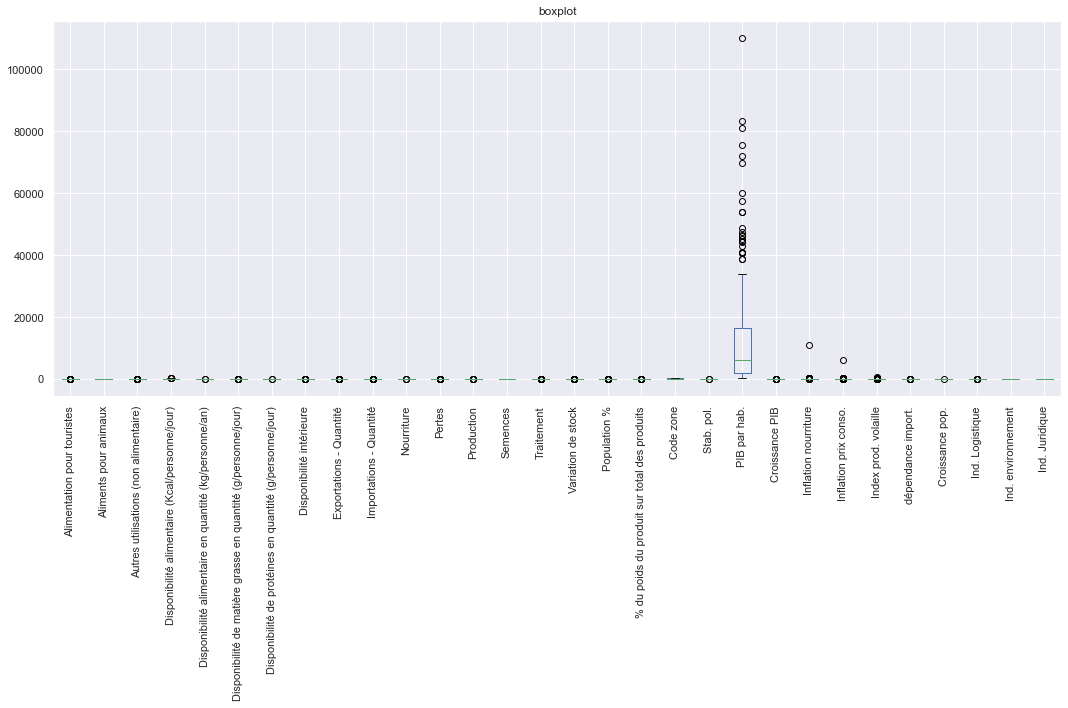

In [237]:
# Set the figure size
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df1.plot(kind='box', title='boxplot')

# Rotate X ticks to see them
plt.xticks(rotation=90);

In [238]:
df[['Zone','PIB par hab.']][df['PIB par hab.'] > 35000]

,Zone,PIB par hab.
4,Allemagne,44652.589172
10,Australie,53934.250175
11,Autriche,47429.158456
16,Belgique,44198.482391
29,Canada,45129.429298
31,Chine - RAS de Hong-Kong,46165.856512
32,Chine - RAS de Macao,81019.473767
42,Danemark,57610.098180
50,Finlande,46412.136478
51,France,38781.049487


Les PIB par habitants sont justifiés, mais ils augmentent l'échelle des ordonnées donc boxplot du PIB par habitant sorti à part. 

<AxesSubplot:title={'center':'boxplot PIB habitant'}>

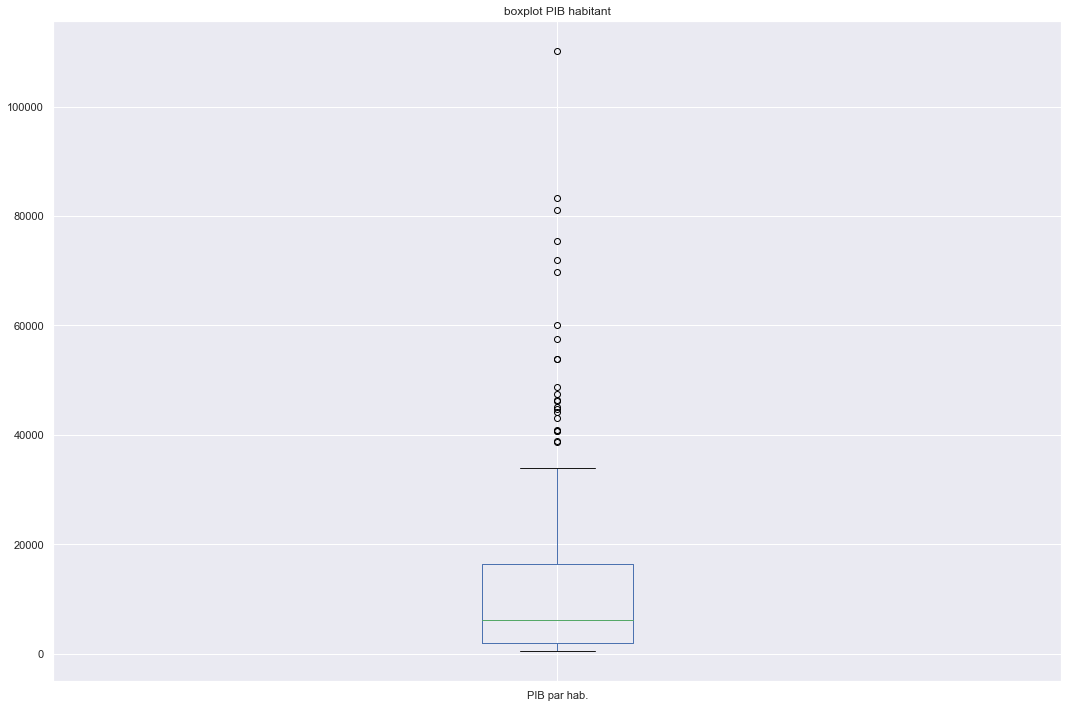

In [239]:
df['PIB par hab.'].plot(kind='box', title='boxplot PIB habitant')

Boxplots des variables de l'inflation mises aussi à part car crise inflationnaire au Pérou augmente l'axe des ordonnées.

<AxesSubplot:title={'center':"Variables sur l'inflation"}>

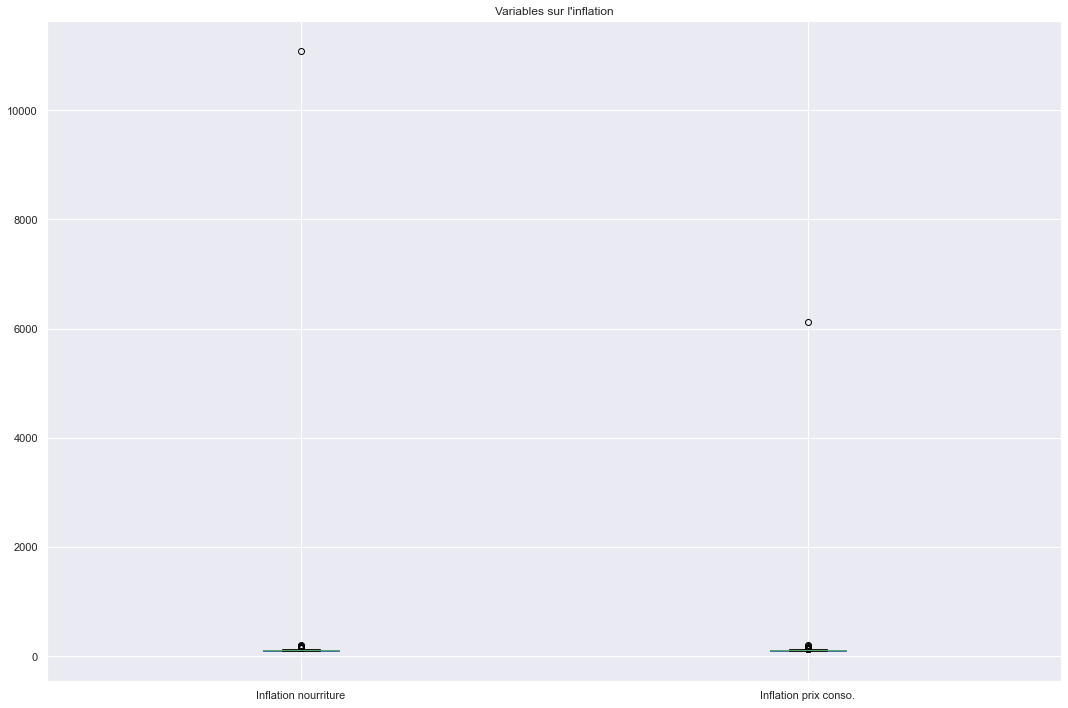

In [240]:
df[['Inflation nourriture','Inflation prix conso.']].plot(kind='box', title='Variables sur l\'inflation')

Les 2 valeurs extrêmes représentent le Pérou.

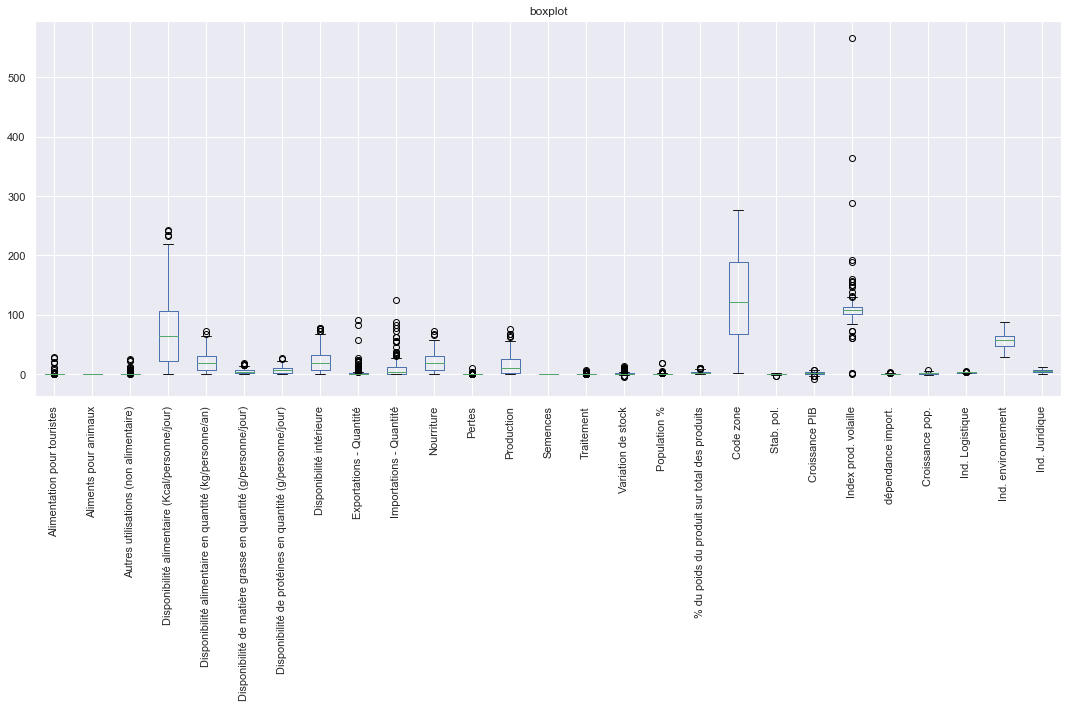

In [241]:
#suppression variable PIB par habitant et d'inflation
df2 = df1.drop(columns=['PIB par hab.','Inflation nourriture','Inflation prix conso.'])

# Set the figure size
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df2.plot(kind='box', title='boxplot')

# Rotate X ticks to see them
plt.xticks(rotation=90);

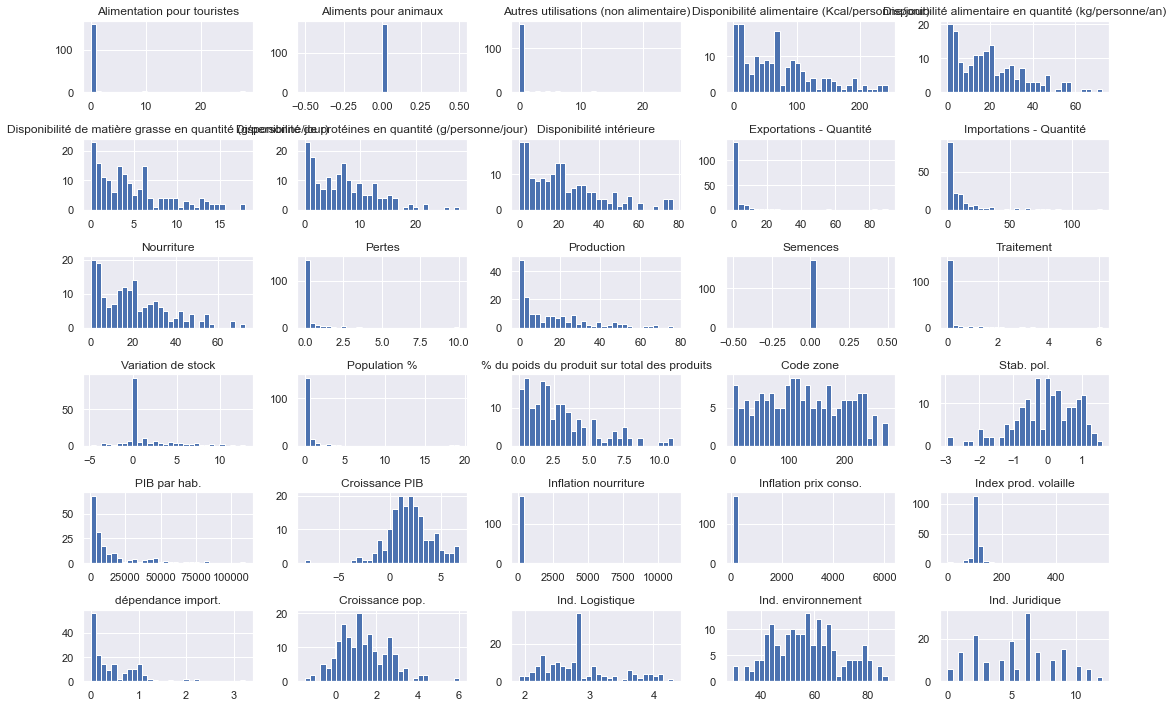

In [242]:
df1.hist(bins=30, figsize=(15, 10));

## <a name="C18">Conclusion analyse univariée après retraitement des variables

On peut supprimer les variable 'Aliments pour animaux' et 'Semences' (toujours 0)

In [243]:
# Suppression des colonne 'Aliments pour animaux' et 'Semences'
df.drop(columns=['Aliments pour animaux','Semences'],axis=1,inplace=True)

# Vérification
df.head()

,Zone,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Code zone,Country Code,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Index prod. volaille,dépendance import.,Croissance pop.,Ind. Logistique,Ind. environnement,Country Name,Ind. Juridique
0,Afghanistan,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.000000,0.000000,0.492533,0.428200,2,AFG,-2.80,516.679862,1.364038,113.832502,110.890929,73.03,0.508772,3.110119,1.92,37.74,Afghanistan,9.0
1,Afrique du Sud,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.000000,0.000000,0.773615,6.414219,202,ZAF,-0.28,6690.939847,0.028992,120.810800,113.906800,97.12,0.242682,1.531772,3.19,44.73,Afrique du Sud,5.0
2,Albanie,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.000000,1.386881,0.039138,1.297908,3,ALB,0.38,4531.019374,2.442059,105.132572,102.488139,157.14,0.808511,-0.183078,2.56,65.46,Albanie,8.0
3,Algérie,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.000000,0.000000,0.561646,0.798788,4,DZA,-0.92,4109.698217,0.971418,111.015653,114.472883,103.17,0.007220,2.021565,2.39,57.18,Algérie,2.0
4,Allemagne,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,2.020363,-0.350841,1.121664,2.072842,79,DEU,0.59,44652.589172,1.083464,105.000000,102.617100,99.19,0.484186,0.487359,4.31,78.37,Allemagne,6.0


# <a name="C100">Export du dataset

In [244]:
# Suppression des colonnes Country Name, Code zone et Country code
df = df.drop(columns=['Country Code','Code zone','Country Name'])

In [245]:
df.to_csv('df.csv', index=True)

In [246]:
df.head()

,Zone,Alimentation pour touristes,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Traitement,Variation de stock,Population %,% du poids du produit sur total des produits,Stab. pol.,PIB par hab.,Croissance PIB,Inflation nourriture,Inflation prix conso.,Index prod. volaille,dépendance import.,Croissance pop.,Ind. Logistique,Ind. environnement,Ind. Juridique
0,Afghanistan,0.0,0.0,5.0,1.53,0.33,0.54,1.570416,0.000000,0.798984,1.515314,0.055102,0.771432,0.000000,0.000000,0.492533,0.428200,-2.80,516.679862,1.364038,113.832502,110.890929,73.03,0.508772,3.110119,1.92,37.74,9.0
1,Afrique du Sud,0.0,0.0,143.0,35.69,9.25,14.11,37.151536,1.105074,9.016001,35.695645,1.455891,29.240609,0.000000,0.000000,0.773615,6.414219,-0.28,6690.939847,0.028992,120.810800,113.906800,97.12,0.242682,1.531772,3.19,44.73,5.0
2,Albanie,0.0,0.0,85.0,16.36,6.45,6.26,16.295855,0.000000,13.175372,16.295855,0.000000,4.507364,0.000000,1.386881,0.039138,1.297908,0.38,4531.019374,2.442059,105.132572,102.488139,157.14,0.808511,-0.183078,2.56,65.46,8.0
3,Algérie,0.0,0.0,22.0,6.38,1.50,1.97,6.692569,0.000000,0.048322,6.378477,0.314092,6.644247,0.000000,0.000000,0.561646,0.798788,-0.92,4109.698217,0.971418,111.015653,114.472883,103.17,0.007220,2.021565,2.39,57.18,2.0
4,Allemagne,0.0,0.0,71.0,19.47,4.16,7.96,21.038392,7.815297,10.186501,19.465654,0.000000,18.316346,2.020363,-0.350841,1.121664,2.072842,0.59,44652.589172,1.083464,105.000000,102.617100,99.19,0.484186,0.487359,4.31,78.37,6.0
